#  Sales prediction using LGR

In this scenario we are using a fictional data of an ecommerce website that has been generated randomly for practice.We are trying to build an algorithm using LGR that predicts whether the customer will buy our product or not. 


We have data from an e-commerce site that has the dependent variable 1:Buying the product and 0:Not buying anything. We have to see which customers are most likely to buy the product and what are the features i.e. nationality, day, income etc of the ideal customer. 

Then we will know which group of customers we need to target more and which group is more profitable so and so. 


**Step 1: Preparing the environment**

We will import the packages and the necessary libraries from Python. We will import the csv file from our computer and open the dataset. We will have a quick look at the features before proceding. 


In [1]:
#importing packages

from pandas import Series;  from numpy.random import randn
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as lgr
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing as preproc
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve as skm

In [2]:
from sklearn.feature_selection import mutual_info_regression

In [3]:
#loading the dataset
saledf=pd.read_csv("C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets\\DigitalAd_dataset.csv")
saledf.head()

,Cust_ID,Gender,Device,First_timer?,Channel,Day,Min_spent,Clicks,Annual_inc,Country,Age,Purchased,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,J#58032A,male,PC,1.0,Social media ads,FRI,4.0,21.0,40000.0,India,41.0,0,NaN,NaN,NaN,NaN
1,Z#51384I,male,Mobile,1.0,Google search,WED,2.0,17.0,40000.0,China,32.0,0,NaN,NaN,NaN,NaN
2,T#46862G,female,PC,0.0,Other,FRI,7.0,20.0,35000.0,Japan,58.0,1,NaN,NaN,NaN,NaN
3,M#33554V,male,Mobile,1.0,Google search,TUE,5.0,15.0,35000.0,Canada,54.0,0,NaN,NaN,NaN,NaN
4,X#92545O,male,Mobile,1.0,Social media ads,SAT,9.0,19.0,10000.0,Ireland,55.0,1,NaN,NaN,NaN,NaN


In [4]:
#understanding the dataset
saledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cust_ID       10999 non-null  object 
 1   Gender        10267 non-null  object 
 2   Device        9743 non-null   object 
 3   First_timer?  10417 non-null  float64
 4   Channel       10866 non-null  object 
 5   Day           10999 non-null  object 
 6   Min_spent     10978 non-null  float64
 7   Clicks        10858 non-null  float64
 8   Annual_inc    9897 non-null   float64
 9   Country       10913 non-null  object 
 10  Age           10867 non-null  float64
 11  Purchased     10999 non-null  int64  
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   1 non-null      object 
dtypes: float64(8), int64(1), object(7)
memory usage: 1.3+ MB


**Step 2: Data cleaning**

We are going to clean the dataset and make it good for analysis. In this step the null values will be replaced by mean(numerical variables) and mode(categorical variables). Then we will replace the outliers in the dataset. Records and fields deemed irrelevant will be dropped. 

In [5]:
#seeing the datatypes
saledf.dtypes

Cust_ID          object
Gender           object
Device           object
First_timer?    float64
Channel          object
Day              object
Min_spent       float64
Clicks          float64
Annual_inc      float64
Country          object
Age             float64
Purchased         int64
Unnamed: 12     float64
Unnamed: 13     float64
Unnamed: 14     float64
Unnamed: 15      object
dtype: object

In [6]:
#seeing the shape
saledf.shape

(10999, 16)

In [7]:
#seeing null values
saledf.isnull().sum()

Cust_ID             0
Gender            732
Device           1256
First_timer?      582
Channel           133
Day                 0
Min_spent          21
Clicks            141
Annual_inc       1102
Country            86
Age               132
Purchased           0
Unnamed: 12     10999
Unnamed: 13     10999
Unnamed: 14     10999
Unnamed: 15     10998
dtype: int64

In [8]:
#seeing the missing data
missing_data=saledf.isnull()
missing_data

,Cust_ID,Gender,Device,First_timer?,Channel,Day,Min_spent,Clicks,Annual_inc,Country,Age,Purchased,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
10995,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
10996,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
10997,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True


In [9]:
#let us see the number of missing values in each column
for column in missing_data.columns.values.tolist():
  print(column,missing_data[column].value_counts())
  print("")

Cust_ID False    10999
Name: Cust_ID, dtype: int64

Gender False    10267
True       732
Name: Gender, dtype: int64

Device False    9743
True     1256
Name: Device, dtype: int64

First_timer? False    10417
True       582
Name: First_timer?, dtype: int64

Channel  False    10866
True       133
Name: Channel , dtype: int64

Day False    10999
Name: Day, dtype: int64

Min_spent False    10978
True        21
Name: Min_spent, dtype: int64

Clicks  False    10858
True       141
Name: Clicks , dtype: int64

Annual_inc False    9897
True     1102
Name: Annual_inc, dtype: int64

Country False    10913
True        86
Name: Country, dtype: int64

Age False    10867
True       132
Name: Age, dtype: int64

Purchased  False    10999
Name: Purchased , dtype: int64

Unnamed: 12 True    10999
Name: Unnamed: 12, dtype: int64

Unnamed: 13 True    10999
Name: Unnamed: 13, dtype: int64

Unnamed: 14 True    10999
Name: Unnamed: 14, dtype: int64

Unnamed: 15 True     10998
False        1
Name: Unnamed: 15,

In [10]:
#replacing missing values with nan(Not a number) that makes things simpler for python
saledf.replace("?",np.nan,inplace = True)
print(saledf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cust_ID       10999 non-null  object 
 1   Gender        10267 non-null  object 
 2   Device        9743 non-null   object 
 3   First_timer?  10417 non-null  float64
 4   Channel       10866 non-null  object 
 5   Day           10999 non-null  object 
 6   Min_spent     10978 non-null  float64
 7   Clicks        10858 non-null  float64
 8   Annual_inc    9897 non-null   float64
 9   Country       10913 non-null  object 
 10  Age           10867 non-null  float64
 11  Purchased     10999 non-null  int64  
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   1 non-null      object 
dtypes: float64(8), int64(1), object(7)
memory usage: 1.3+ MB
None


In [11]:
#let us see the number of missing values in each column
for column in saledf.columns.values.tolist():
  print(column,missing_data[column].value_counts())
  print("")

Cust_ID False    10999
Name: Cust_ID, dtype: int64

Gender False    10267
True       732
Name: Gender, dtype: int64

Device False    9743
True     1256
Name: Device, dtype: int64

First_timer? False    10417
True       582
Name: First_timer?, dtype: int64

Channel  False    10866
True       133
Name: Channel , dtype: int64

Day False    10999
Name: Day, dtype: int64

Min_spent False    10978
True        21
Name: Min_spent, dtype: int64

Clicks  False    10858
True       141
Name: Clicks , dtype: int64

Annual_inc False    9897
True     1102
Name: Annual_inc, dtype: int64

Country False    10913
True        86
Name: Country, dtype: int64

Age False    10867
True       132
Name: Age, dtype: int64

Purchased  False    10999
Name: Purchased , dtype: int64

Unnamed: 12 True    10999
Name: Unnamed: 12, dtype: int64

Unnamed: 13 True    10999
Name: Unnamed: 13, dtype: int64

Unnamed: 14 True    10999
Name: Unnamed: 14, dtype: int64

Unnamed: 15 True     10998
False        1
Name: Unnamed: 15,

In [12]:
#replacing missing values with nan(Not a number) that makes things simpler for python
saledf.replace("?",np.nan,inplace = True)
print(saledf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cust_ID       10999 non-null  object 
 1   Gender        10267 non-null  object 
 2   Device        9743 non-null   object 
 3   First_timer?  10417 non-null  float64
 4   Channel       10866 non-null  object 
 5   Day           10999 non-null  object 
 6   Min_spent     10978 non-null  float64
 7   Clicks        10858 non-null  float64
 8   Annual_inc    9897 non-null   float64
 9   Country       10913 non-null  object 
 10  Age           10867 non-null  float64
 11  Purchased     10999 non-null  int64  
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   1 non-null      object 
dtypes: float64(8), int64(1), object(7)
memory usage: 1.3+ MB
None


In [13]:
#removing useless columns 
saledf=saledf.drop(['Cust_ID','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'],  axis=1)

In [14]:
#taking mode values of gender and replacing null values
gendercnt=saledf['Gender'].value_counts()
print(gendercnt)
mode_gender=saledf['Gender'].value_counts().idxmax()
print("the mode value is",mode_gender)
saledf['Gender'].replace(np.nan, mode_gender, inplace=True)

male      5275
female    4992
Name: Gender, dtype: int64
the mode value is male


In [15]:
#taking mode values of device and replacing null values
devcnt=saledf['Device'].value_counts()
print(devcnt)
mode_dev=saledf['Device'].value_counts().idxmax()
print("the mode value is",mode_dev)
saledf['Device'].replace(np.nan, mode_dev, inplace=True)

Tablet    2524
Mobile    2447
PC        2387
Other     2385
Name: Device, dtype: int64
the mode value is Tablet


In [16]:
#taking mode values of First_timer?  and replacing null values
ftcnt=saledf['First_timer?'].value_counts()
print(ftcnt)
mode_ft=saledf['First_timer?'].value_counts().idxmax()
print("the mode value is",mode_ft)
saledf['First_timer?'].replace(np.nan, mode_ft, inplace=True)

1.0    5309
0.0    5108
Name: First_timer?, dtype: int64
the mode value is 1.0


In [17]:
#taking mode values of Channel  and replacing null values
chncnt=saledf['Channel '].value_counts()
print(chncnt)
mode_chn=saledf['Channel '].value_counts().idxmax()
print("the mode value is",mode_chn)
saledf['Channel '].replace(np.nan, mode_chn, inplace=True)

Google search       1386
Email               1376
Affiliate link      1368
Referral            1367
Other               1357
Youtube channel     1349
Social media ads    1334
Website             1329
Name: Channel , dtype: int64
the mode value is Google search


In [18]:
#taking mode values of Day  and replacing null values
daycnt=saledf['Day'].value_counts()
print(daycnt)
mode_day=saledf['Day'].value_counts().idxmax()
print("the mode value is",mode_day)
saledf['Day'].replace(np.nan, mode_day, inplace=True)

FRI    1633
SAT    1602
TUE    1582
WED    1574
SUN    1559
MON    1535
THU    1514
Name: Day, dtype: int64
the mode value is FRI


In [19]:
#taking mode values of Country and replacing null values
councnt=saledf['Country'].value_counts()
print(councnt)
mode_coun=saledf['Country'].value_counts().idxmax()
print("the mode value is",mode_coun)
saledf['Country'].replace(np.nan, mode_coun, inplace=True)

USA         1149
China       1123
Canada      1120
India       1094
Malaysia    1088
Ireland     1085
Japan       1083
Mexico      1074
Russia      1060
UK          1037
Name: Country, dtype: int64
the mode value is USA


In [20]:
#taking mean values of numerical feature
#gathering mean values of numerical variables
avg_min= saledf["Min_spent"].astype("float").mean(axis=0)
print("The average time spent on website is",avg_min,"minutes.")
avg_inc= saledf["Annual_inc"].astype("float").mean(axis=0)
print("The average annual income is ",avg_inc,"american dollars.")
avg_age= saledf["Age"].astype("float").mean(axis=0)
print("The average age of a vistor is",avg_age,"years.")
avg_click= saledf["Clicks "].astype("float").mean(axis=0)
print("The average number is ",avg_click,"clicks.")

The average time spent on website is 8.44006194206595 minutes.
The average annual income is  49176.1139739315 american dollars.
The average age of a vistor is 42.88267231066532 years.
The average number is  20.03370786516854 clicks.


In [21]:
#replacing numerical missing values with mean
saledf["Min_spent"].replace(np.nan, avg_min, inplace=True)
saledf["Annual_inc"].replace(np.nan, avg_inc, inplace=True)
saledf["Age"].replace(np.nan, avg_age, inplace=True)
saledf["Clicks "].replace(np.nan, avg_click, inplace=True)

In [22]:
#seeing if all null values are gone
saledf.isnull().sum()

Gender          0
Device          0
First_timer?    0
Channel         0
Day             0
Min_spent       0
Clicks          0
Annual_inc      0
Country         0
Age             0
Purchased       0
dtype: int64

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Min_spent'>

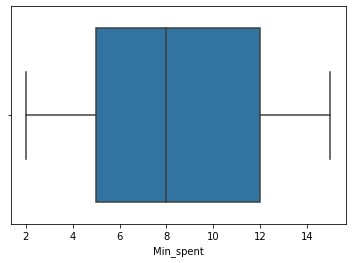

In [23]:
#seeing outliers in min_spent
sb.boxplot(saledf["Min_spent"])

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

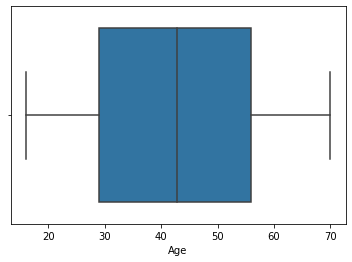

In [24]:
#seeing outliers in age
sb.boxplot(saledf["Age"])

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clicks '>

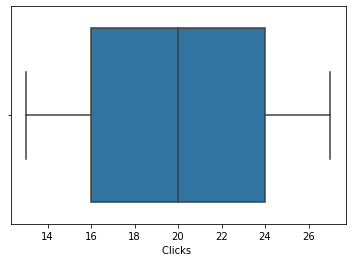

In [25]:
#seeing outliers in clicks
sb.boxplot(saledf["Clicks "])

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_inc'>

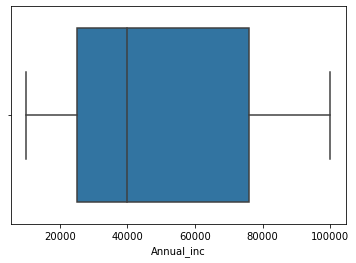

In [26]:
#seeing outliers in annual income
sb.boxplot(saledf["Annual_inc"])

**Step 3: Feature engineering**

Here we are going to modify variables for better use. We are also going to analyse the variables and find out their utility value.
We will encode the categories in categorical variables so that they can be used for LGR. We will rename columns to make them suitable. 

In [27]:
saledf.head(0)

,Gender,Device,First_timer?,Channel,Day,Min_spent,Clicks,Annual_inc,Country,Age,Purchased


In [28]:
#converting variable type
saledf['First_timer?']=saledf['First_timer?'].astype(str)
saledf['Purchased ']=saledf['Purchased '].astype(str)

In [29]:
saledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        10999 non-null  object 
 1   Device        10999 non-null  object 
 2   First_timer?  10999 non-null  object 
 3   Channel       10999 non-null  object 
 4   Day           10999 non-null  object 
 5   Min_spent     10999 non-null  float64
 6   Clicks        10999 non-null  float64
 7   Annual_inc    10999 non-null  float64
 8   Country       10999 non-null  object 
 9   Age           10999 non-null  float64
 10  Purchased     10999 non-null  object 
dtypes: float64(4), object(7)
memory usage: 945.4+ KB


In [30]:
#renaming
saledf.rename(columns={
        "Purchased ": "Bought?",
        "Clicks ": "clickcount",
        "Channel ": "Came_from?"
        
    }, inplace=True,
    )


In [31]:
#initalizing encoder
label_encoder=preproc.LabelEncoder()

#encoding categorical variables 
devenc=label_encoder.fit_transform(saledf['Device'])
chnenc=label_encoder.fit_transform(saledf['Came_from?'])
dayenc=label_encoder.fit_transform(saledf['Day'])
conenc=label_encoder.fit_transform(saledf['Country'])
genenc=label_encoder.fit_transform(saledf['Gender'])

In [32]:
#special function
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.0]

In [33]:
saledf.head(0)

,Gender,Device,First_timer?,Came_from?,Day,Min_spent,clickcount,Annual_inc,Country,Age,Bought?


In [34]:
saledf

,Gender,Device,First_timer?,Came_from?,Day,Min_spent,clickcount,Annual_inc,Country,Age,Bought?
0,male,PC,1.0,Social media ads,FRI,4.0,21.0,40000.0,India,41.0,0
1,male,Mobile,1.0,Google search,WED,2.0,17.0,40000.0,China,32.0,0
2,female,PC,0.0,Other,FRI,7.0,20.0,35000.0,Japan,58.0,1
3,male,Mobile,1.0,Google search,TUE,5.0,15.0,35000.0,Canada,54.0,0
4,male,Mobile,1.0,Social media ads,SAT,9.0,19.0,10000.0,Ireland,55.0,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,female,PC,1.0,Google search,SUN,12.0,13.0,100000.0,India,31.0,0
10995,female,Other,1.0,Website,THU,13.0,18.0,76000.0,Mexico,69.0,1
10996,female,Other,0.0,Affiliate link,FRI,3.0,13.0,40000.0,China,43.0,1
10997,female,Other,0.0,Email,WED,5.0,17.0,58000.0,Japan,19.0,0


In [35]:
#setting X,y
X=pd.DataFrame([saledf["First_timer?"],saledf["Min_spent"],saledf["clickcount"],saledf["Annual_inc"],
                saledf["Age"],devenc,chnenc,dayenc,conenc,genenc]).T
y=saledf["Bought?"]

In [36]:
#seeing the info captured by variables
scores=make_mi_scores(X, y)
scores

C:\Users\sujoydutta\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Min_spent       0.008613
Age             0.008331
First_timer?    0.006797
Annual_inc      0.004499
clickcount      0.001699
Unnamed 1       0.000323
Unnamed 2       0.000253
Unnamed 3       0.000083
Unnamed 0       0.000000
Unnamed 4       0.000000
Name: MI Scores, dtype: float64

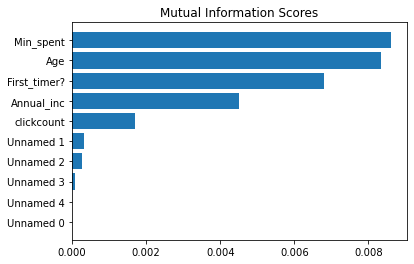

In [37]:
#visual of info captured by variables
plot_mi_scores(scores)

In [38]:
#dropping meaningless variables
X=drop_uninformative(X,scores)
X

,First_timer?,Min_spent,clickcount,Annual_inc,Age,Unnamed 1,Unnamed 2,Unnamed 3
0,1.0,4.0,21.0,40000.0,41.0,5,0,2
1,1.0,2.0,17.0,40000.0,32.0,2,6,1
2,0.0,7.0,20.0,35000.0,58.0,3,0,4
3,1.0,5.0,15.0,35000.0,54.0,2,5,0
4,1.0,9.0,19.0,10000.0,55.0,5,2,3
...,...,...,...,...,...,...,...,...
10994,1.0,12.0,13.0,100000.0,31.0,2,3,2
10995,1.0,13.0,18.0,76000.0,69.0,6,4,6
10996,0.0,3.0,13.0,40000.0,43.0,0,0,1
10997,0.0,5.0,17.0,58000.0,19.0,1,6,4


**Step 4: Exploratory data analysis**

In this step, we are going to explore the dataset. Perform hypothesis tests,bivariate/univariate analysis and check for correlation between variables.  


In [39]:
#summary stats
saledf.describe().round()

,Min_spent,clickcount,Annual_inc,Age
count,10999.0,10999.0,10999.0,10999.0
mean,8.0,20.0,49176.0,43.0
std,4.0,4.0,27293.0,16.0
min,2.0,13.0,10000.0,16.0
25%,5.0,16.0,25000.0,29.0
50%,8.0,20.0,40000.0,43.0
75%,12.0,24.0,76000.0,56.0
max,15.0,27.0,100000.0,70.0


In [40]:
saledf.head(0)

,Gender,Device,First_timer?,Came_from?,Day,Min_spent,clickcount,Annual_inc,Country,Age,Bought?


*Univariate*

In this step, we are going to explore the dataset. Perform hypothesis tests,bivariate/univariate analysis and check for correlation between variables.  

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

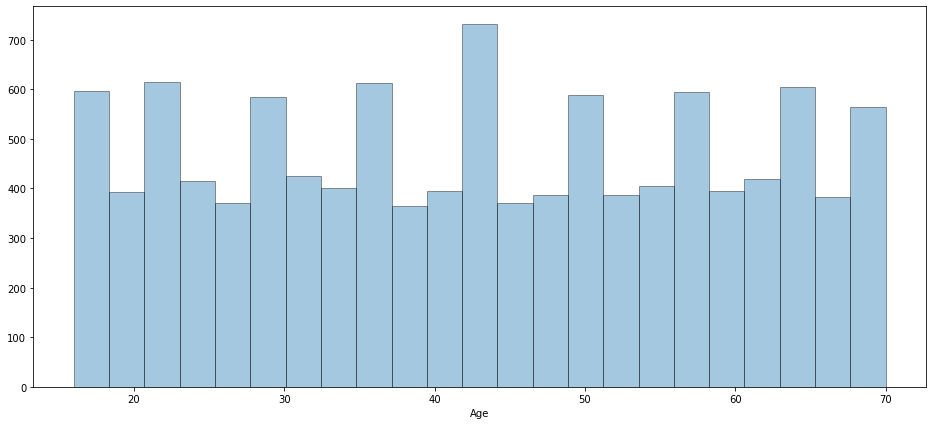

In [41]:
#for Age
plt.figure(figsize=(16,7))
sb.distplot(saledf['Age'], kde = False,hist_kws=dict(edgecolor="k"))

<AxesSubplot:xlabel='Min_spent'>

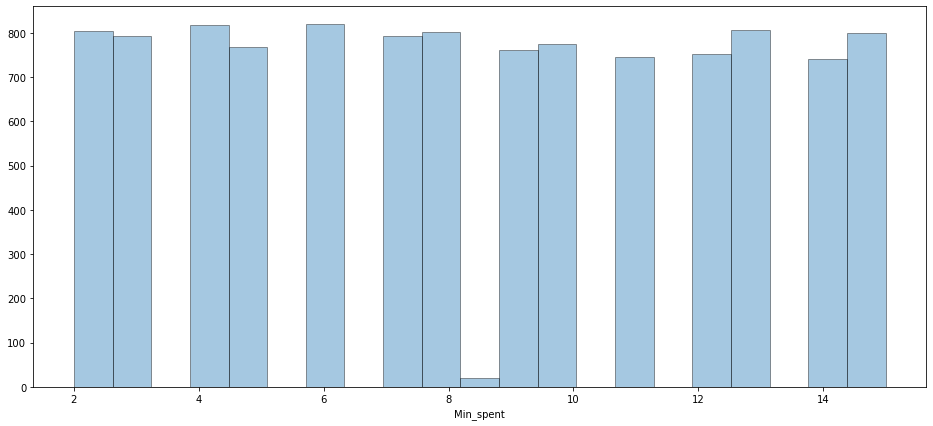

In [42]:
#for Min_spent
plt.figure(figsize=(16,7))
sb.distplot(saledf['Min_spent'], kde = False,hist_kws=dict(edgecolor="k"))

<AxesSubplot:xlabel='clickcount'>

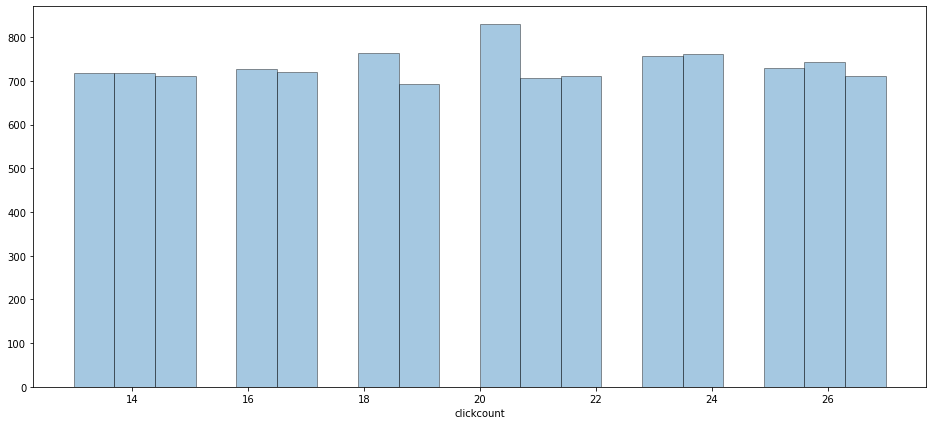

In [43]:
#for clickcount	
plt.figure(figsize=(16,7))
sb.distplot(saledf['clickcount'], kde = False,hist_kws=dict(edgecolor="k"))

<AxesSubplot:xlabel='Annual_inc'>

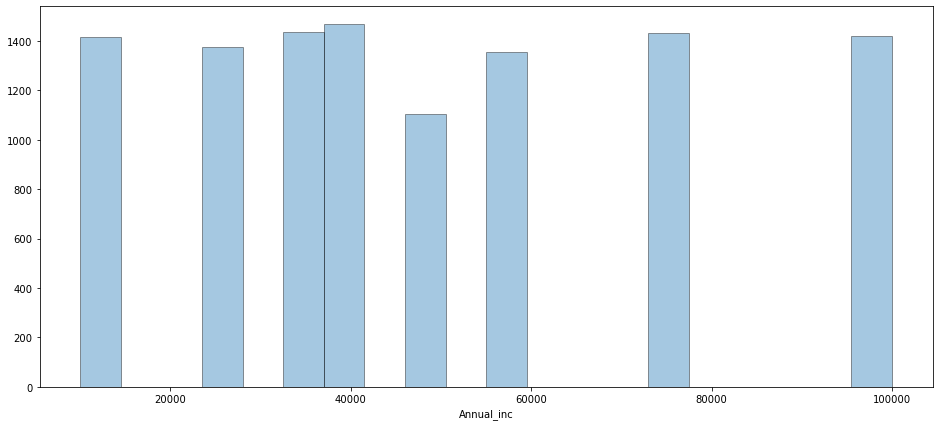

In [44]:
#for Annual_inc
plt.figure(figsize=(16,7))
sb.distplot(saledf['Annual_inc'], kde = False,hist_kws=dict(edgecolor="k"))

*Bi-variate analysis*

checking correlation between variables.

<function matplotlib.pyplot.show(close=None, block=None)>

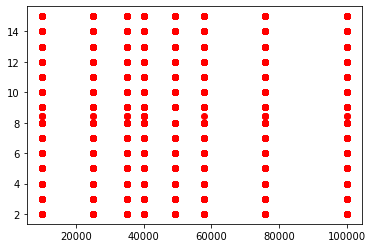

In [45]:
#are people with more income more likely to spend more time on website?
plt.scatter(saledf['Annual_inc'], saledf['Min_spent'], c ="red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

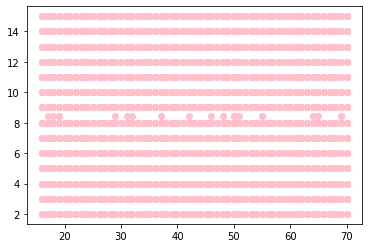

In [46]:
#are people with more age more likely to spend more time on website?
plt.scatter(saledf['Age'], saledf['Min_spent'], c ="pink")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

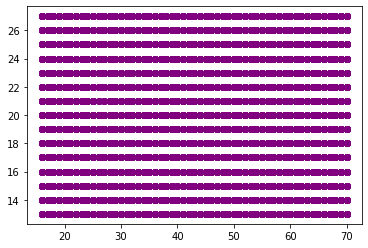

In [47]:
#are people with more age more likely to make more clicks?
plt.scatter(saledf['Age'], saledf['clickcount'], c ="purple")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

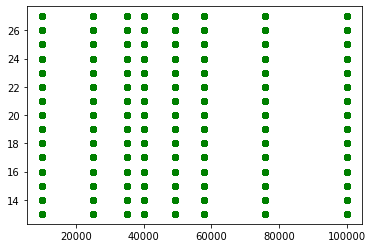

In [48]:
#are people with more income more likely to make more clicks?
plt.scatter(saledf['Annual_inc'], saledf['clickcount'], c ="green")
plt.show

In [49]:
#seeing correlation stats
saledf.corr().round(4)

,Min_spent,clickcount,Annual_inc,Age
Min_spent,1.0000,0.0002,0.0139,-0.0159
clickcount,0.0002,1.0000,-0.0193,-0.0105
Annual_inc,0.0139,-0.0193,1.0000,0.0047
Age,-0.0159,-0.0105,0.0047,1.0000


In [50]:
#checking distribution of Age
stat, p = shapiro(saledf['Age'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.955, p=0.000
Probably not Gaussian


C:\Users\sujoydutta\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [51]:
#checking distribution of clickcount
stat, p = shapiro(saledf['clickcount'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.947, p=0.000
Probably not Gaussian


In [52]:
#checking distribution of Min_spent
stat, p = shapiro(saledf['Min_spent'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.944, p=0.000
Probably not Gaussian


In [53]:
#checking distribution of Annual_inc
stat, p = shapiro(saledf['Annual_inc'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.920, p=0.000
Probably not Gaussian


In [54]:
#seeing sale count
saledf['Bought?'].value_counts()

0    5558
1    5441
Name: Bought?, dtype: int64

In [55]:
#assigning variables to classes
bought_yes=saledf[saledf['Bought?'] == '1']
bought_no=saledf[saledf['Bought?'] == '0']

In [56]:
#conversion rate
convrate=len(bought_yes)/len(saledf)*100
print("The probability of customer buying is",convrate,"percent!")

The probability of customer buying is 49.468133466678786 percent!


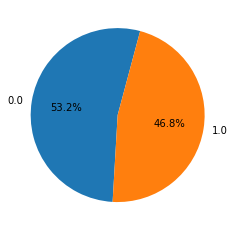

In [57]:
#how many of customers are first timers?
country=bought_yes['First_timer?'].unique()
sales=bought_yes['First_timer?'].value_counts()

#country customer percentage
plt.pie(sales, labels = country, startangle = 75,autopct='%.1f%%')
plt.show()

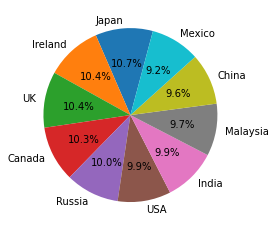

In [58]:
#seeing number of sales per country
country=bought_yes['Country'].unique()
sales=bought_yes['Country'].value_counts()

#country customer percentage
plt.pie(sales, labels = country, startangle = 75,autopct='%.1f%%')
plt.show()

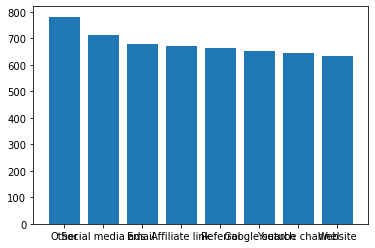

In [59]:
#seeing number of sales per source
Source=bought_yes['Came_from?'].unique()
sale=bought_yes['Came_from?'].value_counts()

#country customer percentage
plt.bar(Source, sale)
plt.show()
plt.rcParams['figure.figsize'] = [10,5]

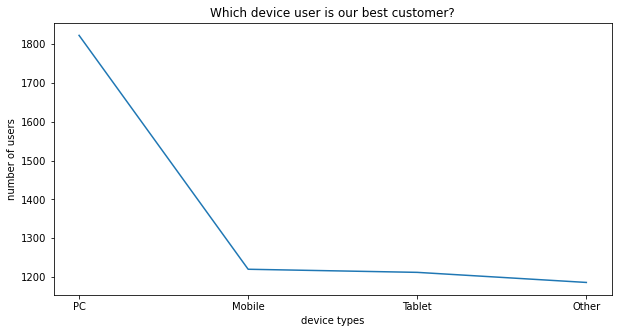

In [60]:
#which device user more likely to buy 
device=bought_yes['Device'].unique()
users=bought_yes['Device'].value_counts()

#plotting fraud cases per spending category
plt.plot(device,users)
plt.title('Which device user is our best customer?')
plt.xlabel('device types')
plt.ylabel('number of users')
plt.rcParams['figure.figsize'] = [17, 7]
plt.show()



C:\Users\sujoydutta\AppData\Local\Temp\ipykernel_5816\1550271726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bought_yes['income-category']=pd.cut(bought_yes['Annual_inc'],bins=bins,labels=labels)


Text(0.5, 1.0, 'Income groups of customers')

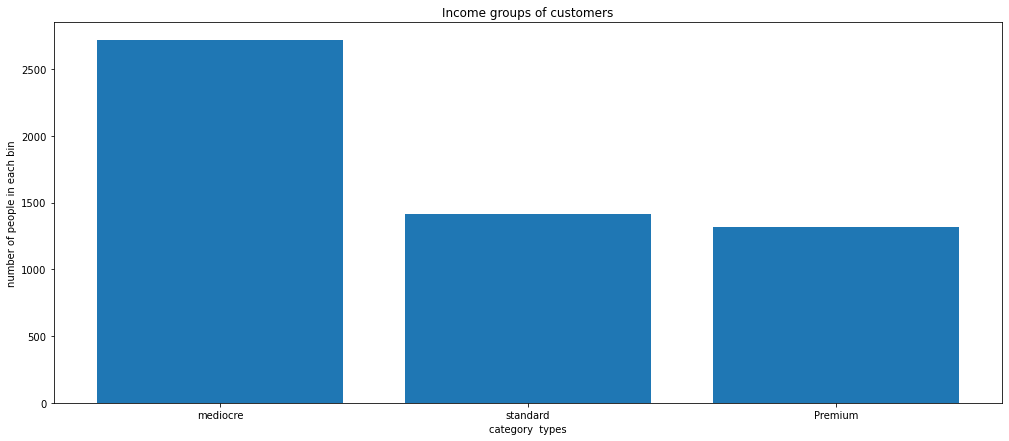

In [61]:
#income category bin
bins=[0,30000,70000,100000]
labels=["mediocre","standard","Premium"]
#cutting
bought_yes['income-category']=pd.cut(bought_yes['Annual_inc'],bins=bins,labels=labels)
bought_yes['income-category'].value_counts()

#plotting the  histogram
plt.bar(labels, bought_yes['income-category'].value_counts())
plt.xlabel("category  types")
plt.ylabel("number of people in each bin")
plt.title("Income groups of customers")

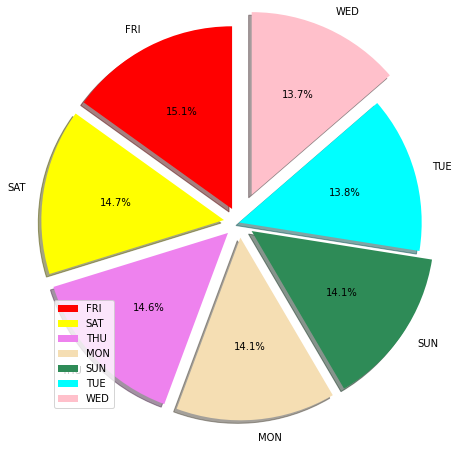

In [62]:
#which day is more good for sale

dayofweek=bought_yes['Day'].unique()
number=bought_yes['Day'].value_counts()


# color for each label
colors = ['red', 'yellow', 'violet', 'wheat','seagreen','cyan','pink']
  
# plotting the pie chart
plt.pie(number, labels = dayofweek, colors=colors, 
        startangle=90, shadow = True ,explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0, 0.2),
        radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()
  
# showing the plot
plt.show()

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


'blue is girl and yellow is boy'

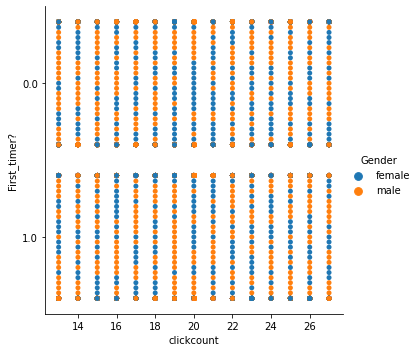

In [63]:
#which gender first time visitors make the most clicks
sb.catplot(data=bought_yes, x="clickcount", y="First_timer?", hue="Gender", kind="swarm")
plt.rcParams['figure.figsize'] = [50, 10]

"blue is girl and yellow is boy"

In [64]:
#does click depend on country?

ct=saledf['Country']
mod = ols("clickcount ~ ct", data = saledf).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
ct,9.0,104.089618,11.565513,0.626417,0.775521
Residual,10989.0,202889.573304,18.462970,NaN,NaN


In [65]:
#does source target different age group?

cf=saledf['Came_from?']
mod = ols("Age ~ cf", data = saledf).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
cf,7.0,1.744688e+03,249.241164,1.001049,0.428182
Residual,10991.0,2.736539e+06,248.979958,NaN,NaN


In [66]:
#does time spent depend on device?

dv=saledf['Device']
mod = ols("Min_spent ~ dv", data = saledf).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
dv,3.0,32.012238,10.670746,0.654448,0.580068
Residual,10995.0,179273.048520,16.304961,NaN,NaN


In [67]:
#are people with high income likely to convert?

bt=saledf['Bought?']
mod = ols("Annual_inc ~ bt", data = saledf).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
bt,1.0,2.167253e+08,2.167253e+08,0.290915,0.589646
Residual,10997.0,8.192539e+12,7.449795e+08,NaN,NaN


In [68]:
#are first timers most likely to make more clicks?

ft=saledf['First_timer?']
mod = ols("clickcount ~ ft", data = saledf).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
ft,1.0,0.210935,0.210935,0.011427,0.914872
Residual,10997.0,202993.451986,18.458984,NaN,NaN


In [69]:
#are first timers most likely to spend more time?

ft=saledf['First_timer?']
mod = ols("Min_spent ~ ft", data = saledf).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
ft,1.0,23.625749,23.625749,1.449187,0.228684
Residual,10997.0,179281.435009,16.302758,NaN,NaN


In [70]:
#are number of clicks dependent on days?

day=saledf['Day']
mod = ols("clickcount ~ Day", data = saledf).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
Day,6.0,33.466564,5.577761,0.302083,0.936095
Residual,10992.0,202960.196357,18.464356,NaN,NaN


**Finding**

1. Number of clicks are almost the same on every day,country and visitor types.
2. First timers and regular vistors have the same amount of clicks and spend the same amount of time
3. There is no correlation among numerical data types. 
4. Regular visitors are more likely to buy then first timers.
5. People of all age groups come from different sources
6. Sale probaility is less than 50%
7. Sales are slightly higher on Fridays and slightly lower on Wednesday
8. People spend the same amount of time from all devices types. 
9. People who make the purchase are mostly PC users and come from other unspecified chanels.
10. Both men and women first timers make the same number of clicks.
11. Most of the buyers have an income below 70,000 dollars per annum. 
12. It is not necessary that a person with higher income is a likely customer. 

**Step 5: Model Building**

Now we are going to build the LGR model to predict the clients who is likely to make a sale. The data has been cleaned and explored. 

In [71]:
#initializing lgr and sc 
lgmodel=lgr(solver='lbfgs')
sc=StandardScaler()

In [72]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=0)


In [73]:
#using standard scaler
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [74]:
#fitting the model
lgmodel.fit(X = X_train,
            y = y_train)

LogisticRegression()

In [75]:
#check model intercept and co ef
print(lgmodel.intercept_)
print(lgmodel.coef_)

[-0.03132409]
[[-0.02402529  0.00277058 -0.02352577  0.01052735 -0.04488104 -0.03455662
  -0.03044072 -0.01999826]]


In [76]:
#checking the model 

Y_pred = lgmodel.predict(X_test)
#printing metrics
print(classification_report(y_test,Y_pred))




              precision    recall  f1-score   support

           0       0.49      0.65      0.56      1369
           1       0.49      0.34      0.40      1381

    accuracy                           0.49      2750
   macro avg       0.49      0.49      0.48      2750
weighted avg       0.49      0.49      0.48      2750



In [77]:
#confusion matrix
cm=confusion_matrix(y_test,Y_pred)
print(cm)

[[886 483]
 [918 463]]


In [78]:
print("Accuracy of the model: {0}%".format(accuracy_score(y_test,Y_pred)*100))

Accuracy of the model: 49.054545454545455%


**Step 6: Building the algorithm**

We will trim the existing dataset and put the necessary variables in the model. We will build a model that takes input in the form of the necessary variables and tells us whether this person will buy or not. 

In [79]:
#seeing ideal dataset
X.head(0)

,First_timer?,Min_spent,clickcount,Annual_inc,Age,Unnamed 1,Unnamed 2,Unnamed 3


In [80]:
#comparing with original 
saledf.head(0)

,Gender,Device,First_timer?,Came_from?,Day,Min_spent,clickcount,Annual_inc,Country,Age,Bought?


In [81]:
#seeing first unnamed 
X['Unnamed 1'].value_counts()

2    1519
1    1376
0    1368
4    1367
3    1357
7    1349
5    1334
6    1329
Name: Unnamed 1, dtype: int64

In [82]:
#seeing original values
saledf['Came_from?'].value_counts()

Google search       1519
Email               1376
Affiliate link      1368
Referral            1367
Other               1357
Youtube channel     1349
Social media ads    1334
Website             1329
Name: Came_from?, dtype: int64

In [83]:
#seeing second unnamed 
X['Unnamed 2'].value_counts()

0    1633
2    1602
5    1582
6    1574
3    1559
1    1535
4    1514
Name: Unnamed 2, dtype: int64

In [84]:
#seeing original values
saledf['Day'].value_counts()

FRI    1633
SAT    1602
TUE    1582
WED    1574
SUN    1559
MON    1535
THU    1514
Name: Day, dtype: int64

In [85]:
#seeing third unnamed 
X['Unnamed 3'].value_counts()

9    1235
1    1123
0    1120
2    1094
5    1088
3    1085
4    1083
6    1074
7    1060
8    1037
Name: Unnamed 3, dtype: int64

In [86]:
#seeing original values
saledf['Country'].value_counts()

USA         1235
China       1123
Canada      1120
India       1094
Malaysia    1088
Ireland     1085
Japan       1083
Mexico      1074
Russia      1060
UK          1037
Name: Country, dtype: int64

In [87]:
#dropping unnecessary columns
saledftrim=saledf.drop(["Gender","Device"], axis=1)

In [91]:
#building function
First_timer=int(input("first timer?"))
Came_from=int(input("came from?"))
Day=int(input("which day?"))
Min_spent=int(input("time spent?"))
clickcount=int(input("how many clicks done?"))
Annual_inc=int(input("how much you earn annually?"))
Country=int(input("From which country do you belong?"))
Age=int(input("How old are you?"))
newcust=[[First_timer,Came_from,Day,Min_spent,clickcount,Annual_inc,Country,Age]]
result=lgmodel.predict(sc.transform(newcust))
print(result)
if result == 1:
    print("sale done")
else:
    print("sale not done")

first timer?1
came from?1
which day?2
time spent?21
how many clicks done?21
how much you earn annually?40000
From which country do you belong?3
How old are you?41
['0']
sale not done


C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
